<a href="https://colab.research.google.com/github/avinashxh/Python/blob/master/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=11c6f2a4845b7caafc8ece5afe56b31a2e91b74147dfe3a4d9f6b5c08b295cbc
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.shape # Dataset size ( rows : 38765 , columns : 3 )

(38765, 3)

In [ ]:
df.isna().any()  #no null values found

,0
Member_number,False
Date,False
itemDescription,False


In [ ]:
df['date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


<ipython-input-7-b4f584225f8a>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['Date'])


In [ ]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


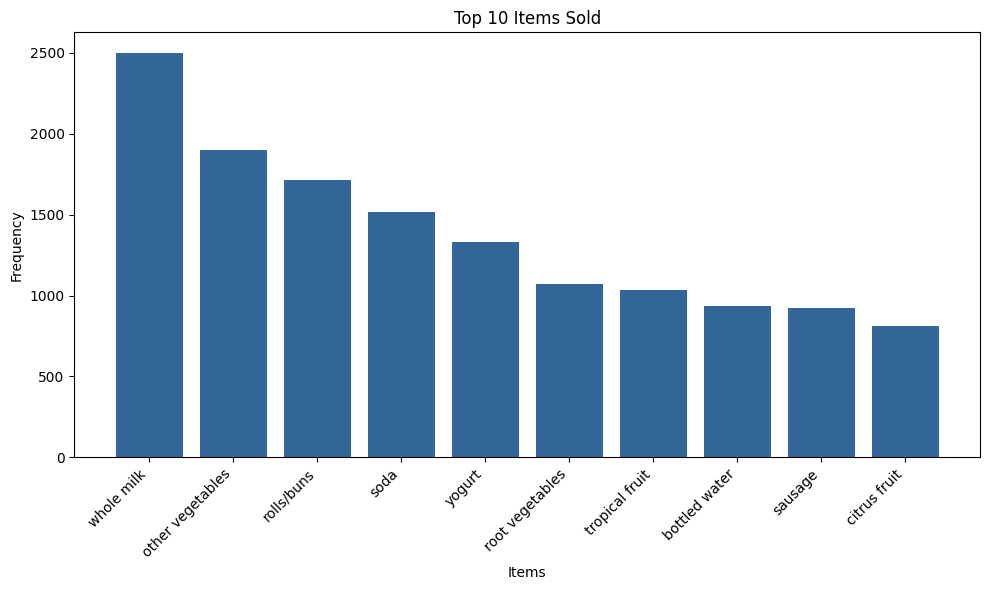

In [ ]:
# Group by 'itemDescription', calculate frequencies, and sort in descending order
item_distribution = (
    df.groupby(by='itemDescription')
    .size()
    .reset_index(name='Frequency')
    .sort_values(by='Frequency', ascending=False)
)

# Select top 10 items
top_10 = item_distribution.head(10)

bars = top_10['itemDescription']
heights = top_10['Frequency']
x_pos = np.arange(len(bars))

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.bar(x_pos, heights, color=(0.2, 0.4, 0.6, 1.0))  # More opaque color

plt.title("Top 10 Items Sold")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.xticks(x_pos, bars, rotation=45, ha='right')  # Rotate x-axis labels for clarity

plt.tight_layout()  # Adjust layout to avoid label overlap
plt.show()


In [ ]:
df_date = df.set_index('date')
df_date.head()

,Member_number,Date,itemDescription
date,,,
2015-07-21,1808,21-07-2015,tropical fruit
2015-01-05,2552,05-01-2015,whole milk
2015-09-19,2300,19-09-2015,pip fruit
2015-12-12,1187,12-12-2015,other vegetables
2015-02-01,3037,01-02-2015,whole milk


<ipython-input-12-07a818c0ce79>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_date.resample('M')['itemDescription'].count().plot(figsize=(20, 8), grid=True, title = 'no of items sold by month').set(xlabel='date', ylabel='no of items sold')


[Text(0.5, 0, 'date'), Text(0, 0.5, 'no of items sold')]

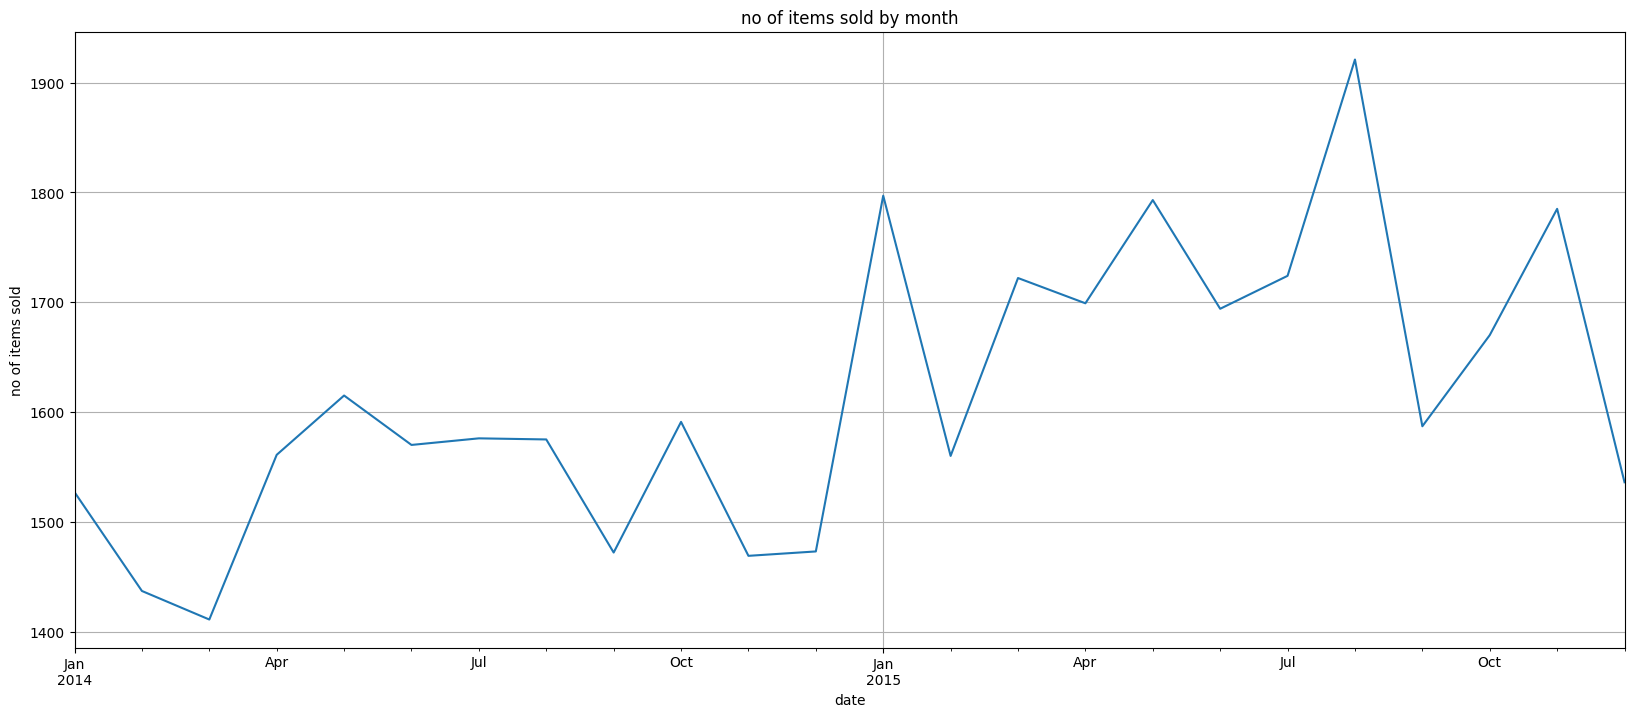

In [ ]:
df_date.resample('M')['itemDescription'].count().plot(figsize=(20, 8), grid=True, title = 'no of items sold by month').set(xlabel='date', ylabel='no of items sold')

In [ ]:
cust_level = df[['Member_number', 'itemDescription']].sort_values('Member_number', ascending = False)
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [ ]:
transactions = cust_level.groupby('Member_number')['itemDescription'].apply(list)
transactions

,itemDescription
Member_number,
1000,"[misc. beverages, sausage, soda, yogurt, salty..."
1001,"[beef, sausage, frankfurter, soda, whipped/sou..."
1002,"[specialty chocolate, butter, whole milk, butt..."
1003,"[dental care, rolls/buns, rolls/buns, frozen m..."
1004,"[frozen fish, shopping bags, hygiene articles,..."
...,...
4996,"[decalcifier, soda, rolls/buns, dessert, tropi..."
4997,"[tropical fruit, curd, grapes, canned beer, wh..."
4998,"[curd, rolls/buns]"


In [ ]:
from apyori import apriori

rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length = 2, max_length = 2)

In [ ]:
results = list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
def inspect(results):
    lhs = [tuple(results[2][0][0])[0] for results in results]
    rhs = [tuple(results[2][0][1])[0] for results in results]
    supports = [results[1] for results in results]
    confidences = [results[2][0][2] for results in results]
    lifts = [results[2][0][3] for results in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,0.300000,3.821569
1,potato products,beef,0.002565,0.454545,3.802185
2,canned fruit,coffee,0.002309,0.428571,3.728954
4,flour,mayonnaise,0.002309,0.063380,3.338599
6,sparkling wine,waffles,0.002565,0.217391,3.150154
5,rice,napkins,0.003079,0.244898,3.011395
3,meat spreads,domestic eggs,0.003592,0.400000,3.004239


In [ ]:
# To be done using : FP- Growth Algorithm (works well with larger transaction values)